In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
#Ejecta Module Equations

def ejecta_thickness_first(d, r):
    """ Return ejecta thickness given (Delta: \u03B4) given complex crater radius (r, meters) and distance from crater rim (d, meters) in the first order: -2.5
    
    Explicitly applies to continuous ejecta (hypothetical 4*crater radii)"""
    
    return 0.14 * (r**0.74) * ((d/r)**(-2.5))

def ejecta_thickness_second(d, r):
    """ Return ejecta thickness (Delta: \u03B4) given complex crater radius (r, meters) and distance from crater rim (d, meters) in the second order: -3.0
    
    Explicitly applies to continuous ejecta (hypothetical 4*crater radii)"""
    
    return 0.14 * (r**0.74) * ((d/r)**(-3.0))

def ejecta_thickness_third(d, r):
    """Return ejecta thickness (Delta: \u03B4) given complex crater radius (r, meters) and distance from crater rim (d, meters) in the third order: -3.5
    
    Explicity applies to continuous ejecta (hypotehtical 4*crater radii)"""
    
    return 0.14 * (r**0.74) * ((d/r)**(-3.5))

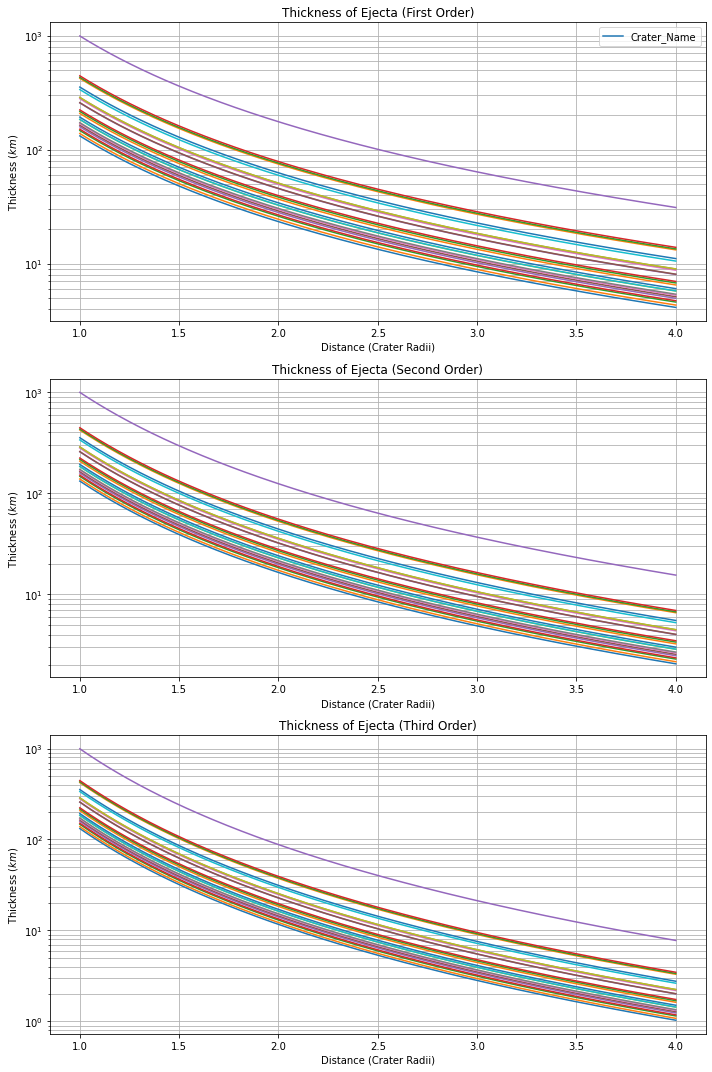

In [83]:
#Variables for thickness equations

rad = pd.read_csv('cannon2020_crater_ages_python.csv', usecols=[9]) #Pulls Craters Diameter(km) from Cannon
Crater_Names = pd.read_csv('cannon2020_crater_ages_python.csv', usecols=[0])
r = (rad['Diameter_km'])*1000./2. #Radius of craters from cannon, in meters (m)

d = np.arange(650)*1000 #1D Array of distance values from 0 to 650 km --> 0 to 650,000 in meters

thickness_first = np.zeros((len(r), len(d))) #Empty arrays with (x,y) dimensions of (# of craters of interest, 0 to max distance values)
thickness_second = np.zeros((len(r), len(d))) #Empty arrays with (x,y) dimensions of (# of craters of interest, 0 to max distance values)
thickness_third = np.zeros((len(r), len(d))) #Empty arrays with (x,y) dimensions of (# of craters of interest, 0 to max distance values)

#Adding Values of thickness to empty arrays 
for i in range(0,len(r)):
    thickness_first[i,:] = ejecta_thickness_first(np.linspace(1.*r[i], 4.*r[i], len(d)), r[i])
"""for value r: start at 1, end at 4*crater radii, do this for the number of values in d"""

for i in range(0,len(r)):
    thickness_second[i,:] = ejecta_thickness_second(np.linspace(1.*r[i], 4.*r[i], len(d)), r[i])
    
for i in range(0,len(r)):
    thickness_third[i,:] = ejecta_thickness_third(np.linspace(1.*r[i], 4.*r[i], len(d)), r[i])

#Lets Plot
f, ax = plt.subplots(3, figsize =(10,15))


#First Order Equation
for i in range(0, len(r)):
    ax[0].semilogy(np.linspace(1.*r[i],4.*r[i], len(d))/r[i], thickness_first[i,:], label='Thickness')
ax[0].set_title('Thickness of Ejecta (First Order)')
ax[0].set_xlabel('Distance (Crater Radii)')
ax[0].set_ylabel('Thickness ($km$)')
ax[0].grid(True, which="both")

#Second Order Equation
for i in range(0, len(r)):
    ax[1].semilogy(np.linspace(1.*r[i], 4.*r[i], len(d))/r[i], thickness_second[i,:], label='Thickness')
ax[1].set_title('Thickness of Ejecta (Second Order)')
ax[1].set_xlabel('Distance (Crater Radii)')
ax[1].set_ylabel('Thickness ($km$)')
ax[1].grid(True, which="both")

#Third Order Equation
for i in range(0, len(r)):
    ax[2].semilogy(np.linspace(1.*r[i], 4.*r[i],len(d))/r[i], thickness_third[i,:], label='Thickness')
ax[2].set_title('Thickness of Ejecta (Third Order)')
ax[2].set_xlabel('Distance (Crater Radii)')
ax[2].set_ylabel('Thickness ($km$)')
ax[2].grid(True, which="both")

plt.tight_layout()